In [1]:
# importing the needed packages
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# reading the data
X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, parser="auto", as_frame=False)
y_mnist = y_mnist.astype(int)

In [3]:
# keeping only the digits 7, 8, and 9
X = X_mnist[(y_mnist > 6)]
y = y_mnist[(y_mnist > 6)]

In [4]:
# the values of y_train
np.unique(y)

array([7, 8, 9])

In [5]:
# applying PCA and keeping only two components
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

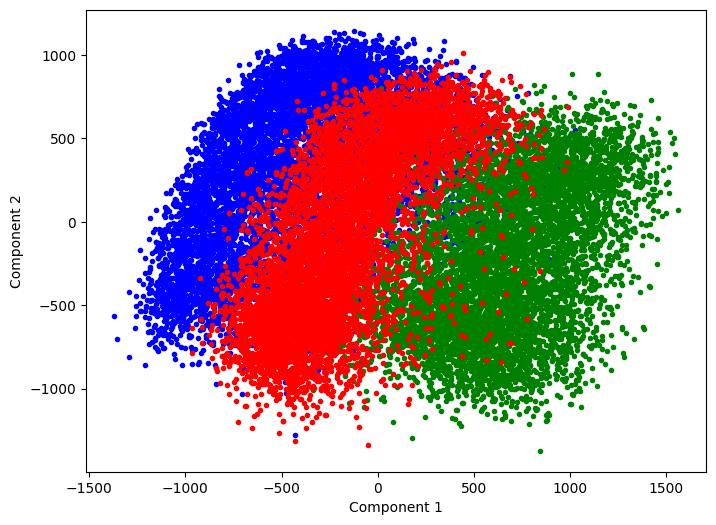

In [6]:
# visualizing the data
fig = plt.figure(figsize=(8,6))
plt.plot(X_pca[y == 7, 0], X_pca[y == 7, 1], "b.")
plt.plot(X_pca[y == 8, 0], X_pca[y == 8, 1], "g.")
plt.plot(X_pca[y == 9, 0], X_pca[y == 9, 1], "r.")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [7]:
# training the KMean models
k_range = range(2, 11)
kmeans_per_k = []
for k in k_range:
    print(f"Training {k = }")
    kmeans = KMeans(n_clusters=k, n_init = "auto", random_state=42)
    kmeans.fit(X_pca)
    kmeans_per_k.append(kmeans)

Training k = 2
Training k = 3
Training k = 4
Training k = 5
Training k = 6
Training k = 7
Training k = 8
Training k = 9
Training k = 10


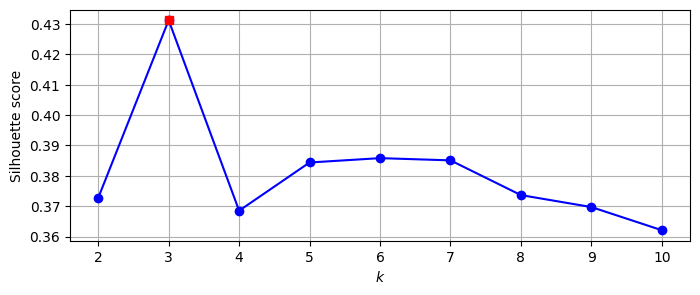

In [8]:
# calculating the silouette score
silhouette_scores = [silhouette_score(X_pca, model.labels_) for model in kmeans_per_k]

# finding the number of clusters for the best model
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]

# the score of the best model
best_score = silhouette_scores[best_index]

# plotting the silouette score as a function of the number of clusters, and the score of the best model
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

In [9]:
# finding the center of each cluster of the best model
best_model = kmeans_per_k[best_index]
best_model.cluster_centers_

array([[-137.03744909,  539.82285386],
       [-512.89674047, -390.53326707],
       [ 685.76158849, -219.11582954]])

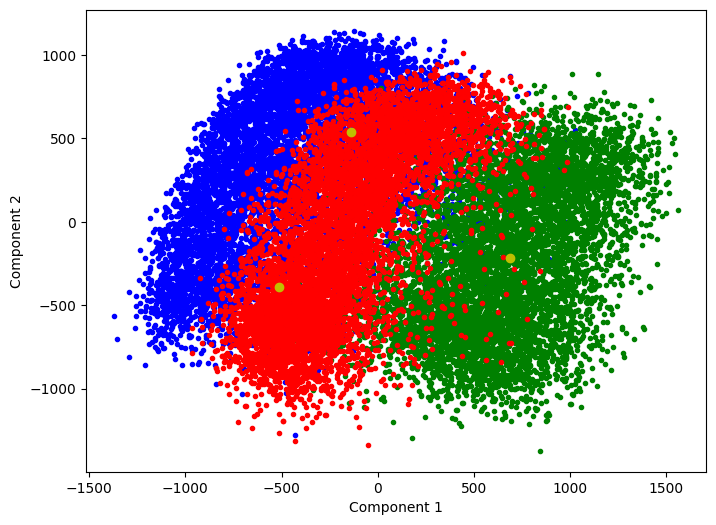

In [14]:
# visualizing the cluster centers
c1=best_model.cluster_centers_[:, 0]
c2=best_model.cluster_centers_[:, 1]

fig = plt.figure(figsize=(8,6))
plt.plot(X_pca[y == 7, 0], X_pca[y == 7, 1], "b.")
plt.plot(X_pca[y == 8, 0], X_pca[y == 8, 1], "g.")
plt.plot(X_pca[y == 9, 0], X_pca[y == 9, 1], "r.")
plt.plot(c1, c2, "yo")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

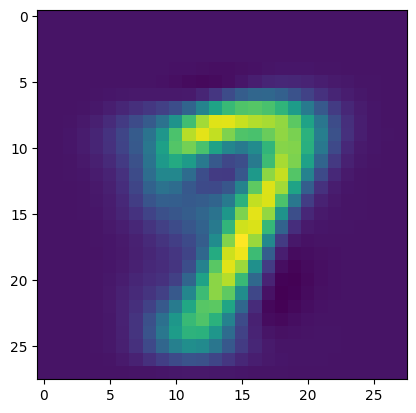

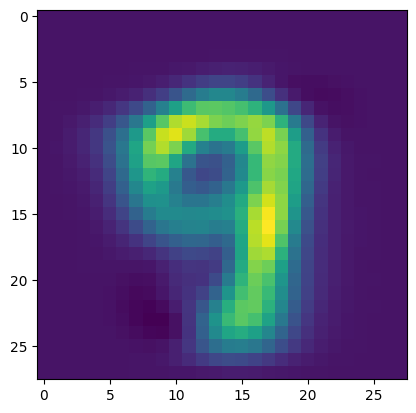

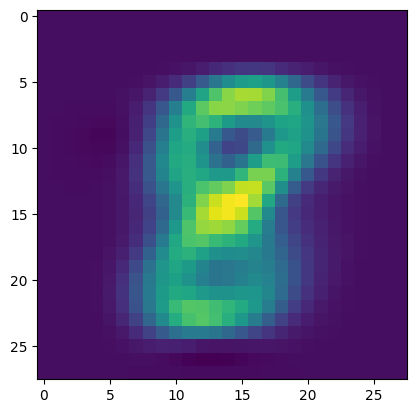

In [10]:
# constructing the image using inverse transform of the pca components and plot the images
for center in best_model.cluster_centers_:
    img = pca.inverse_transform(center)
    plt.imshow(img.reshape(28,28))
    plt.show()